#설정

In [ ]:
# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# matplot lib에서 사용 가능한 한글 폰트
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath('/content/drive/MyDrive/socar/70sEnt/'))
plt.rc('font', family='NanumBarunGothic')

In [ ]:
cd /content/drive/MyDrive/socar/70sEnt/

/content/drive/MyDrive/socar/70sEnt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from Preprocessing import data_preprocessing

# 코드 정리


## 쏘카 파일 로딩

In [ ]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv("/content/drive/MyDrive/socar/데이터/20211022_수요예측_hackathon_data.csv", encoding='cp949')
df

In [ ]:
socar_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/'
weather_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/기상데이터/'
finedust_file_apth='/content/drive/MyDrive/00_Aiffelton/데이터/미세먼지/'
standard_time='time2'
location=None

df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,location)

In [ ]:
regionA = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'A지역')
regionB = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'B지역')
regionC = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'C지역')
regionD = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'D지역')
regionE = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'E지역')

## 인구통계정보

In [ ]:
population_df = pd.read_csv("/content/drive/MyDrive/socar/데이터/인구구별데이터/시군구_성_연령_1세_별_주민등록연앙인구_20220425222717.csv", encoding='cp949')

In [ ]:
population_df["A연령대"] = population_df.iloc[:,3:12].sum(axis=1)
population_df["B연령대"] = population_df.iloc[:,12:22].sum(axis=1)
population_df["C연령대"] = population_df.iloc[:,22:32].sum(axis=1)
population_df["D연령대"] = population_df.iloc[:,32:42].sum(axis=1)
population_df["E연령대"] = population_df.iloc[:,42:62].sum(axis=1)
population_df

### 1. 특정지역-연령별 인구수





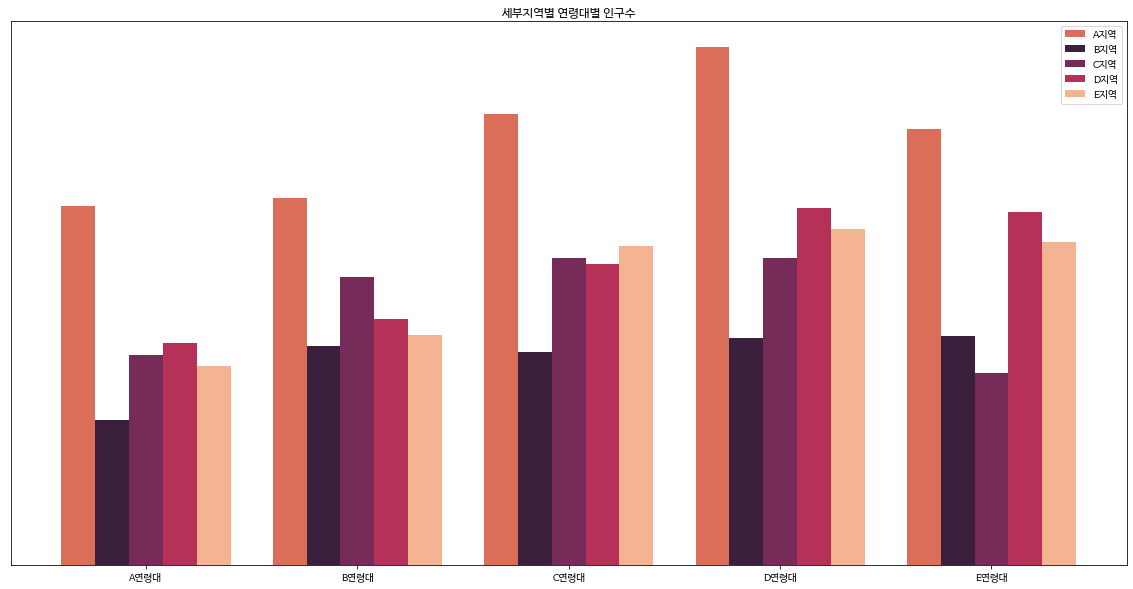

In [ ]:
x_list = ["A연령대", "B연령대", "C연령대","D연령대","E연령대"]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(5, 0.8, 1, 5)
value_b_x = create_x(5, 0.8, 2, 5)
value_c_x = create_x(5, 0.8, 3, 5)
value_d_x = create_x(5, 0.8, 4, 5)
value_e_x = create_x(5, 0.8, 5, 5)

f,ax = plt.subplots(figsize=(20,10))

ax.bar(value_a_x, population_df.loc[(population_df["행정구역(시군구)별"]=="A지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#DB6E59" ,  label='A지역')
ax.bar(value_b_x, population_df.loc[(population_df["행정구역(시군구)별"]=="B지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#3B203E" ,  label='B지역')
ax.bar(value_c_x, population_df.loc[(population_df["행정구역(시군구)별"]=="C지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#772B58" ,  label='C지역')
ax.bar(value_d_x, population_df.loc[(population_df["행정구역(시군구)별"]=="D지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#B53158" ,  label='D지역')
ax.bar(value_e_x, population_df.loc[(population_df["행정구역(시군구)별"]=="E지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#F5B491" , label='E지역')


middle_x = [(a+b+c+d+e)/5 for (a,b,c,d,e) in zip(value_a_x, value_b_x,value_c_x,value_d_x,value_e_x)]
ax.set_xticks(middle_x)
ax.get_yaxis().set_visible(False)
ax.set_xticklabels(x_list)
ax.legend()
plt.title("세부지역별 연령대별 인구수")
plt.show()

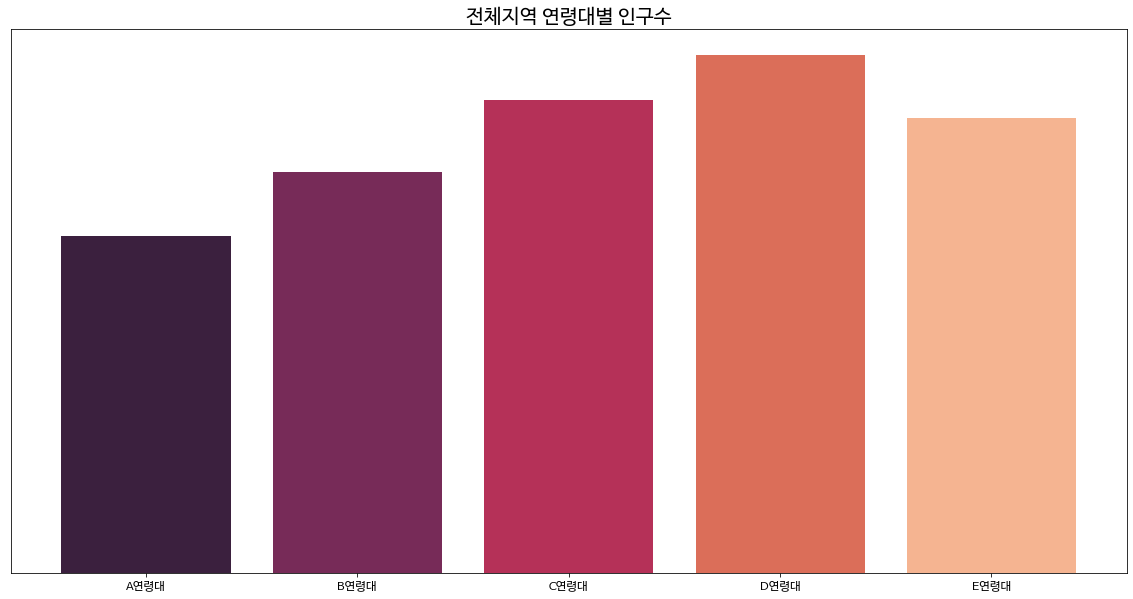

In [ ]:
x_list = ["A연령대", "B연령대", "C연령대","D연령대","E연령대"]

plt.figure(figsize=(20,10))

plt.bar(x_list,population_df.iloc[0,-5:],color=["#3B203E","#772B58","#B53158","#DB6E59","#F5B491"])

plt.xticks(fontsize = 12)
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.title("전체지역 연령대별 인구수",fontsize  = 20)
plt.show()

절대적인 인구수를 확인하였을 때 연령대가 가진 특성이 있음을 확인하였다.   


## 자동차 소유율 


1. a월부터 b월까지의 월평균 자동차 보유수를 구하였다.
2. 이와 쏘카 특성 A의 상관관계를 구하였다.    
<img src="https://user-images.githubusercontent.com/33904461/175208356-341b0a35-1b3a-46bb-b882-2a1186e53dc4.png" width=50%/>

자동차 보유율과 쏘카 특성 A의 상관관계를 확인하기 위해 pearson 계수를 사용하였다. (선형적인 관계가 어떻게 되는지 알아보기 위함)   
- 관계 확인 결과 두 관계는 강한 음의 상관관계를 보인다.

이에 더 나아가 자동차 보유율을 더욱 세부적인 기준으로 추정치를 구하여 쏘카 특성 A와 상관관계를 확인하였다.    
(보안 서약 관계상 공개 불가)

따라서 자동차 소유율을 feature로 사용하는데 타당하다고 판단하여 static varible로 가공한다.